### Importing Dependencies

In [290]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
   
import warnings
warnings.filterwarnings('ignore')

### Data Collection and Loading

In [291]:
# Loading File using read_csv() method
customer_data = pd.read_csv("Dataset/Mall_Customers.csv")

In [292]:
#Let's have a preview of the dataset
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [293]:
customer_data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [294]:
# Method 1: Using rename() method
customer_data = customer_data.rename(columns={'Genre': 'Gender'})
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Exploratory Data Analysis (EDA)

In [295]:
#Let's See How many Rows and Columns Exist
row, col = customer_data.shape
print(f"Number of Rows: {row}\nNumber of Columnss: {col}")

Number of Rows: 200
Number of Columnss: 5


In [296]:
 #Delving Deep into Information about the DataFrame
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


- It is evident from the data that there is no need for missing value handilg cause 200 out of 200 rows are Non-Null for all the given features.
- Note: We have following levels of measurement:
    - 2 Nominal (`CustomerID` , `Gender`)
    - 1 Interval (`Spending Score`)
    - 2 Ratio (`Age` , `Annual Income`)

In [297]:
#Explicitely Calculating Missing Values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [298]:
#Let's look into some of the Summary Statistics
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [299]:
customer_data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [300]:
# Let's percentage of Male-Female ratio in the data set
customer_data.Gender.value_counts(normalize= True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

In [301]:
customer_dataNew =customer_data.copy()

# Define 5 bins and labels for Age-Group
binsAge = 5  # or you can use custom bin edges like [0, 20, 35, 50, 65, 100]
labelsAge = ['Very Young', 'Young Adult', 'Middle Aged', 'Senior', 'Elderly']

# Define 3 bins and labels for Spending-Habit
binsScore = 3  
labelsScore = ['Low', 'Medium', 'High']

# Define 3 bins and labels for Income-Group
binsIncome = 3  
labelsIncome = ['EconomyClass', 'MiddleClass', 'BusineesClass']

# Create binned column in the original DataFrame
customer_dataNew['AgeGroup'] = pd.cut(customer_dataNew['Age'], bins=binsAge, labels=labelsAge)
customer_dataNew['SpendingHabit'] = pd.cut(customer_dataNew['Spending Score (1-100)'], bins=binsScore, labels=labelsScore)
customer_dataNew["IncomeGroup"]=pd.cut(customer_dataNew['Annual Income (k$)'], bins=binsIncome, labels=labelsIncome)

customer_dataNew.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),AgeGroup,SpendingHabit,IncomeGroup
0,1,Male,19,15,39,Very Young,Medium,EconomyClass
1,2,Male,21,15,81,Very Young,High,EconomyClass
2,3,Female,20,16,6,Very Young,Low,EconomyClass
3,4,Female,23,16,77,Very Young,High,EconomyClass
4,5,Female,31,17,40,Young Adult,Medium,EconomyClass


<Figure size 700x700 with 0 Axes>

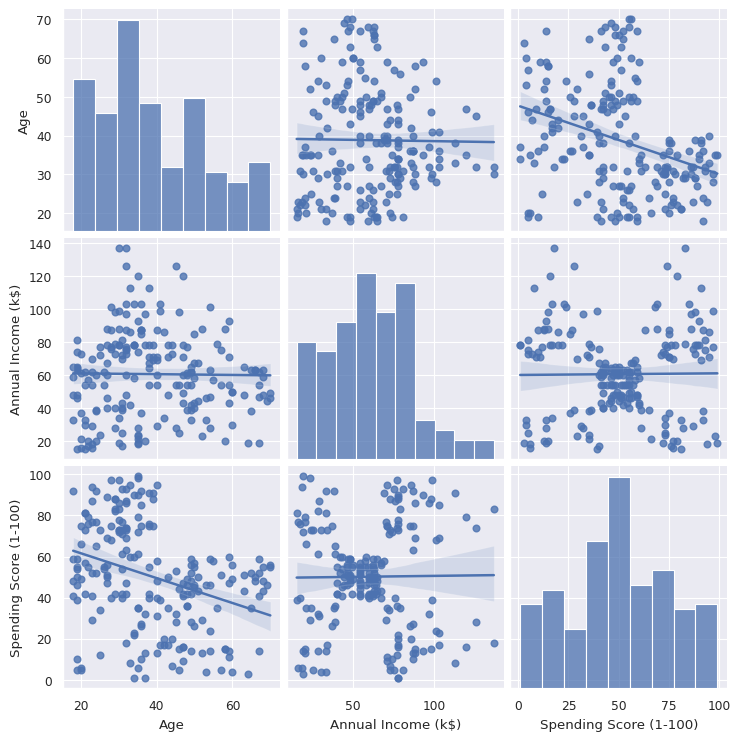

In [302]:
plt.figure(figsize=(7,7))
sns.set_theme(context="paper")
sns.pairplot(customer_dataNew.drop(['CustomerID',"Gender"],axis="columns"),kind="reg",diag_kind="hist")
plt.show()

The **Scatter-Matrix Plot** depicts the following:
 - Histogram of Age, Annual Income Shows slight +ve skewness
 - Spending Score is almost Normally Distributed
 - The Scatter-Plot(s) depict no note-worthy trend between variables concerned.

Note: Further Investigation will be carried out using **Kernel Desity**

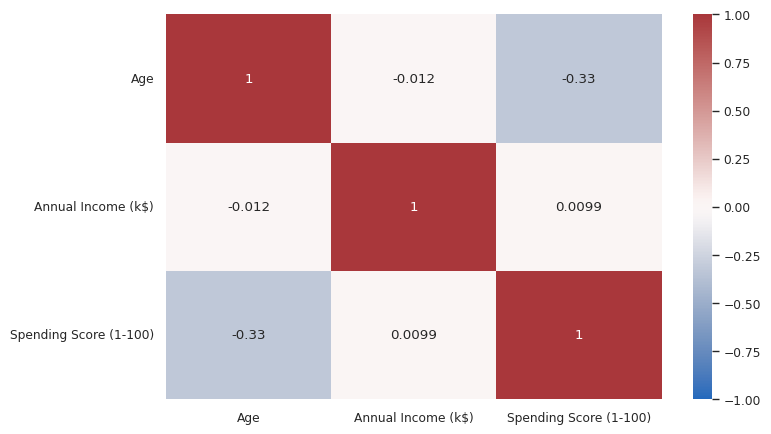

In [303]:
plt.figure(figsize= (8,5))
cr = customer_data.drop(["CustomerID","Gender"],axis="columns").corr()
sns.heatmap(cr,annot= True , vmin=-1 ,vmax= 1, center= 0, cmap="vlag")
plt.show()

The above Correlation Matrix depict the following:
- Age Vs. Annual Income
    - Strength of Association is very low (Medium) and indirect
    - With increase in Age, income goes down. (Strength is low, hence not convincing)
- Age Vs. Spending Score
    - Strength of Association is low (highest) and indirect
    - With increase in Age, Spending decreases.
- Annual Income and Spending Score
    - Strength of Association is negligible (lowest) and direct
    - Annual Income and Spending increase-decrease simultaneously. (Strength is low, hence not convincing)


In [304]:
#Let's deep-dive into interaction of more than one variable at a time
inc1 = customer_dataNew[(customer_dataNew["SpendingHabit"]=="Low") & (customer_dataNew["Gender"]=="Male")]["Annual Income (k$)"].mean()
inc2 = customer_dataNew[(customer_dataNew["SpendingHabit"]=="Low") & (customer_dataNew["Gender"]=="Female")]["Annual Income (k$)"].mean()
print(round(inc1,2),inc2)
customer_dataNew[(customer_dataNew["SpendingHabit"]=="Low") & (customer_dataNew["Annual Income (k$)"] >= inc1)]["Gender"].value_counts()

70.79 63.36


Gender
Male      18
Female    13
Name: count, dtype: int64

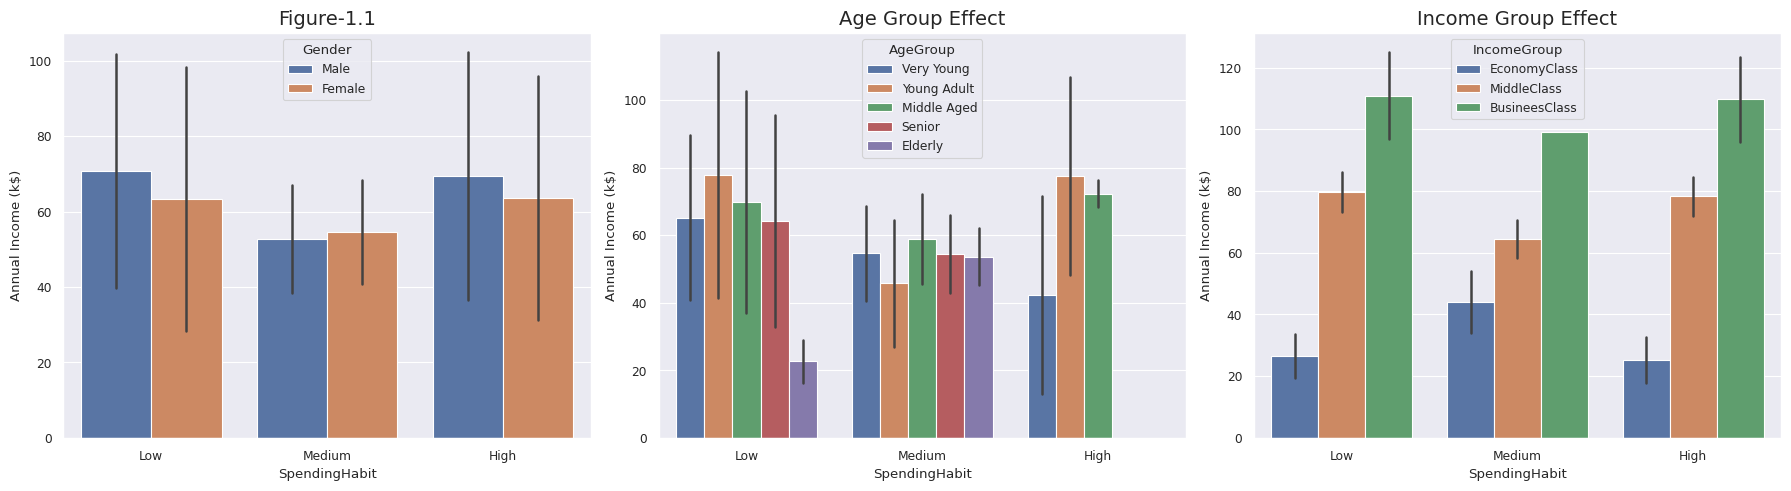

In [305]:
fig,axes = plt.subplots(1,3,figsize=(18,5))
sns.set_theme("paper","dark")

sns.barplot(data=customer_dataNew, x="SpendingHabit", y="Annual Income (k$)", hue="Gender",ax=axes[0],errorbar= ("sd"))
axes[0].set_title("Figure-1.1",fontsize = 14)
# sns.scatterplot(data=customer_dataNew, x="Annual Income (k$)",y ="Spending Score (1-100)", hue="Gender",ax=axes[0][1])

sns.barplot(data=customer_dataNew, x="SpendingHabit", y="Annual Income (k$)", hue="AgeGroup",ax=axes[1],errorbar= ("sd"))
axes[1].set_title("Age Group Effect",fontsize = 14)
# sns.scatterplot(data=customer_dataNew, x="Annual Income (k$)",y="Spending Score (1-100)", hue="AgeGroup",ax=axes[1][1])

sns.barplot(data=customer_dataNew, x="SpendingHabit" ,y="Annual Income (k$)", hue="IncomeGroup",ax=axes[2],errorbar= ("sd"))
axes[2].set_title("Income Group Effect",fontsize = 14)
# sns.scatterplot(data=customer_dataNew, x="Annual Income (k$)",y="Spending Score (1-100)", hue="Gender",ax=axes[2][1])
# sns.scatterplot(data=customer_dataNew, x="Annual Income (k$)", y="Spending Score (1-100)", hue="IncomeGroup",ax=axes[1])
# sns.scatterplot(data=customer_dataNew, x="Annual Income (k$)", y="Spending Score (1-100)", hue="AgeGroup",ax=axes[2])

plt.tight_layout()
plt.show()


- The Above Baarplot (With Embedded-SD: Black Straight-line running in the middle):
    - `Figure-1.1`- Gender Disparity:
        - Low, High Spending


In [306]:
inc1 = customer_dataNew[(customer_dataNew["SpendingHabit"]=="Low") & (customer_dataNew["Gender"]=="Male")]["Annual Income (k$)"].mean()
inc2 = customer_dataNew[(customer_dataNew["SpendingHabit"]=="Low") & (customer_dataNew["Gender"]=="Female")]["Annual Income (k$)"].mean()
print(round(inc1,2),inc2)
customer_dataNew[(customer_dataNew["SpendingHabit"]=="Low") & (customer_dataNew["Annual Income (k$)"] >= inc1)]["Gender"].value_counts()

70.79 63.36


Gender
Male      18
Female    13
Name: count, dtype: int64

In [307]:
customer_dataNew[(customer_dataNew["SpendingHabit"]=="Low") & (customer_dataNew["Annual Income (k$)"] >= inc1)]["Gender"].value_counts()

Gender
Male      18
Female    13
Name: count, dtype: int64

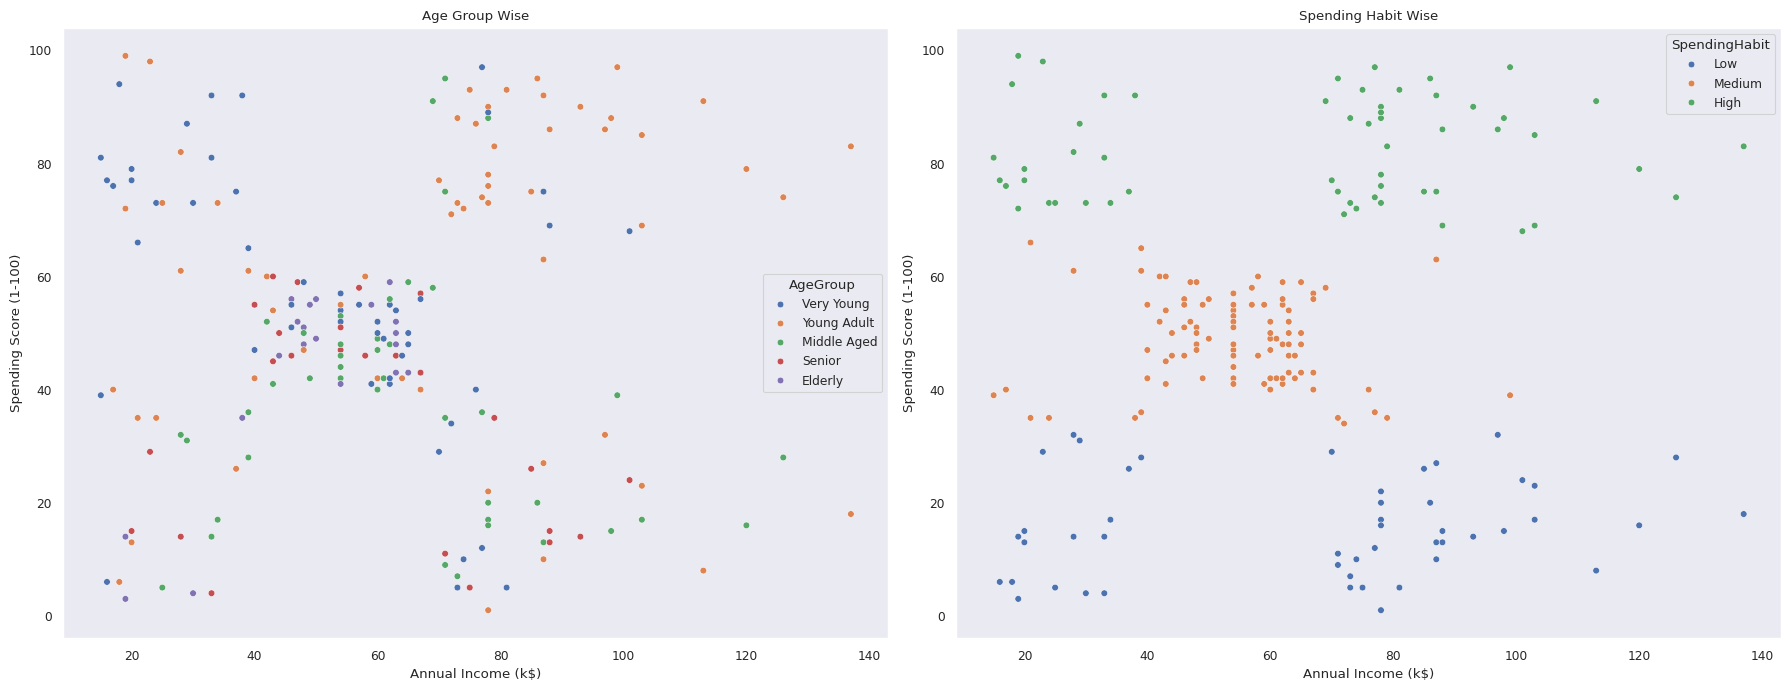

In [308]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# First Plot - Age Group Wise
sns.scatterplot(
    data=customer_dataNew,
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    hue="AgeGroup",
    ax=axes[0]
)
axes[0].set_title("Age Group Wise")

# Second Plot - Spending Habit Wise
sns.scatterplot(
    data=customer_dataNew,
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    hue="SpendingHabit",
    ax=axes[1]
)
axes[1].set_title("Spending Habit Wise")

plt.tight_layout()
plt.show()


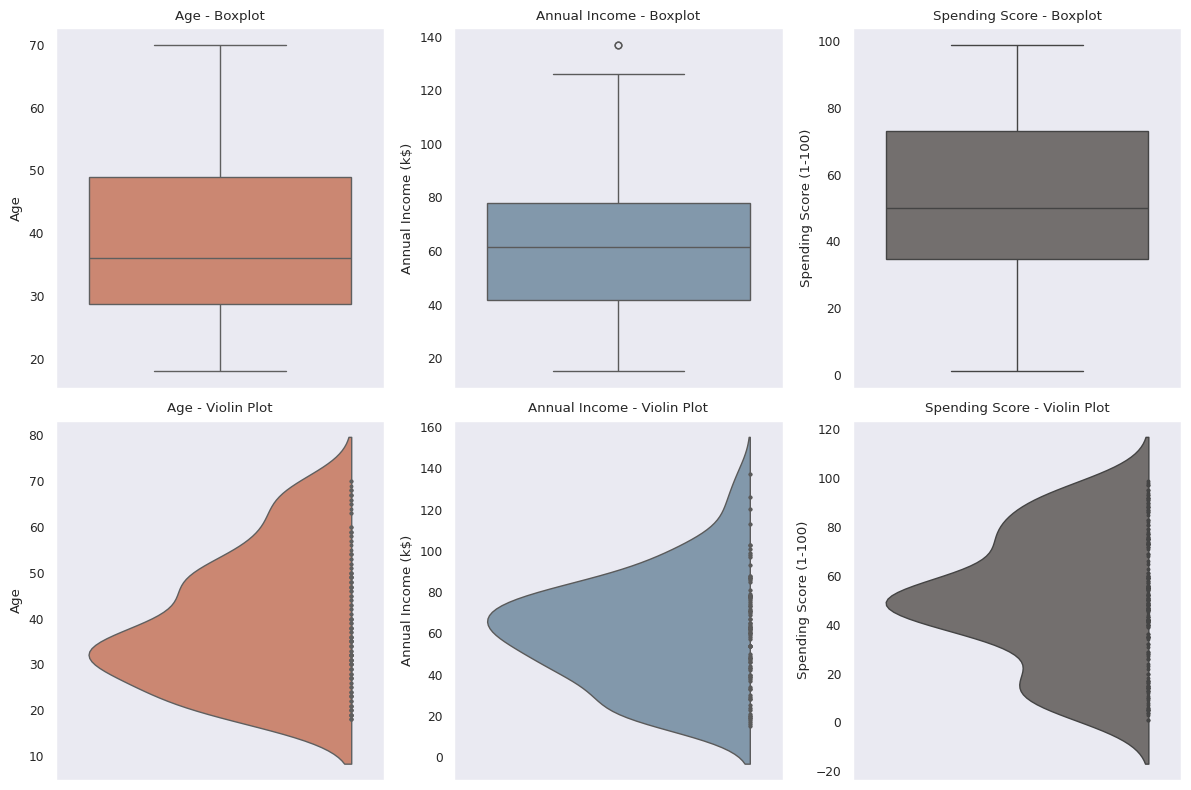

In [309]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))  # 2 rows, 3 columns

# First row: Boxplots
sns.boxplot(data=customer_data["Age"], ax=axes[0, 0], color="#DA7F63")
axes[0, 0].set_title("Age - Boxplot")

sns.boxplot(data=customer_data["Annual Income (k$)"], ax=axes[0, 1], color="#7B98B2")
axes[0, 1].set_title("Annual Income - Boxplot")

sns.boxplot(data=customer_data["Spending Score (1-100)"], ax=axes[0, 2], color="#746f6D")
axes[0, 2].set_title("Spending Score - Boxplot")

# Second row: Violin plots
sns.violinplot(data=customer_data["Age"], ax=axes[1, 0],split=True, inner="point", color="#DA7F63")
axes[1, 0].set_title("Age - Violin Plot")

sns.violinplot(data=customer_data["Annual Income (k$)"],split=True, inner="point", ax=axes[1, 1], color="#7B98B2")
axes[1, 1].set_title("Annual Income - Violin Plot")

sns.violinplot(data=customer_data["Spending Score (1-100)"],split=True, inner="point", ax=axes[1, 2], color="#746f6D")
axes[1, 2].set_title("Spending Score - Violin Plot")

plt.tight_layout()
plt.show()


- The above Box-Plot reveals the following:
    - Absence of Outliers (except in Income)

- Violine Plot Shows:
    - The KDEs show almost nomally distributed probality curve

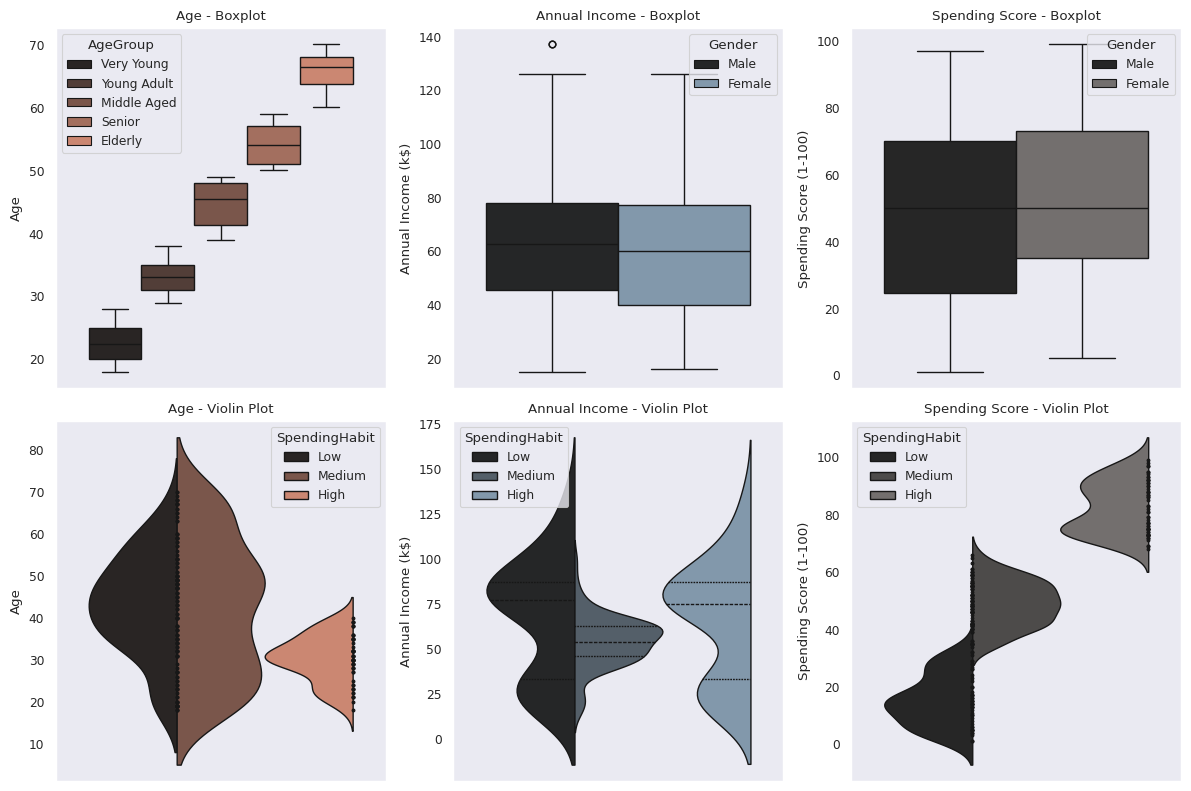

In [310]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))  # 2 rows, 3 columns

# First row: Boxplots
sns.boxplot(data=customer_dataNew, y ="Age",hue = "AgeGroup", ax=axes[0, 0], color="#DA7F63")
axes[0, 0].set_title("Age - Boxplot")

sns.boxplot(data=customer_dataNew, y="Annual Income (k$)",hue="Gender", ax=axes[0, 1], color="#7B98B2")
axes[0, 1].set_title("Annual Income - Boxplot")

sns.boxplot(data=customer_dataNew,y ="Spending Score (1-100)",hue="Gender", ax=axes[0, 2], color="#746f6D")
axes[0, 2].set_title("Spending Score - Boxplot")

# Second row: Violin plots
sns.violinplot(data=customer_dataNew,y= "Age",hue="SpendingHabit", ax=axes[1, 0],split=True, inner="point", color="#DA7F63")
axes[1, 0].set_title("Age - Violin Plot")

sns.violinplot(data=customer_dataNew,y= "Annual Income (k$)",hue="SpendingHabit",split=True, inner="quart", ax=axes[1, 1], color="#7B98B2")
axes[1, 1].set_title("Annual Income - Violin Plot")

sns.violinplot(data=customer_dataNew,y ="Spending Score (1-100)",hue ="SpendingHabit",split=True, inner="point", ax=axes[1, 2], color="#746f6D")
axes[1, 2].set_title("Spending Score - Violin Plot")

plt.tight_layout()
plt.show()

- The above Box-Plot reveals the following:
    - Absence of Outliers (except in Income)

- Violine Plot Shows:
    - The KDEs show almost nomally distributed probality curve

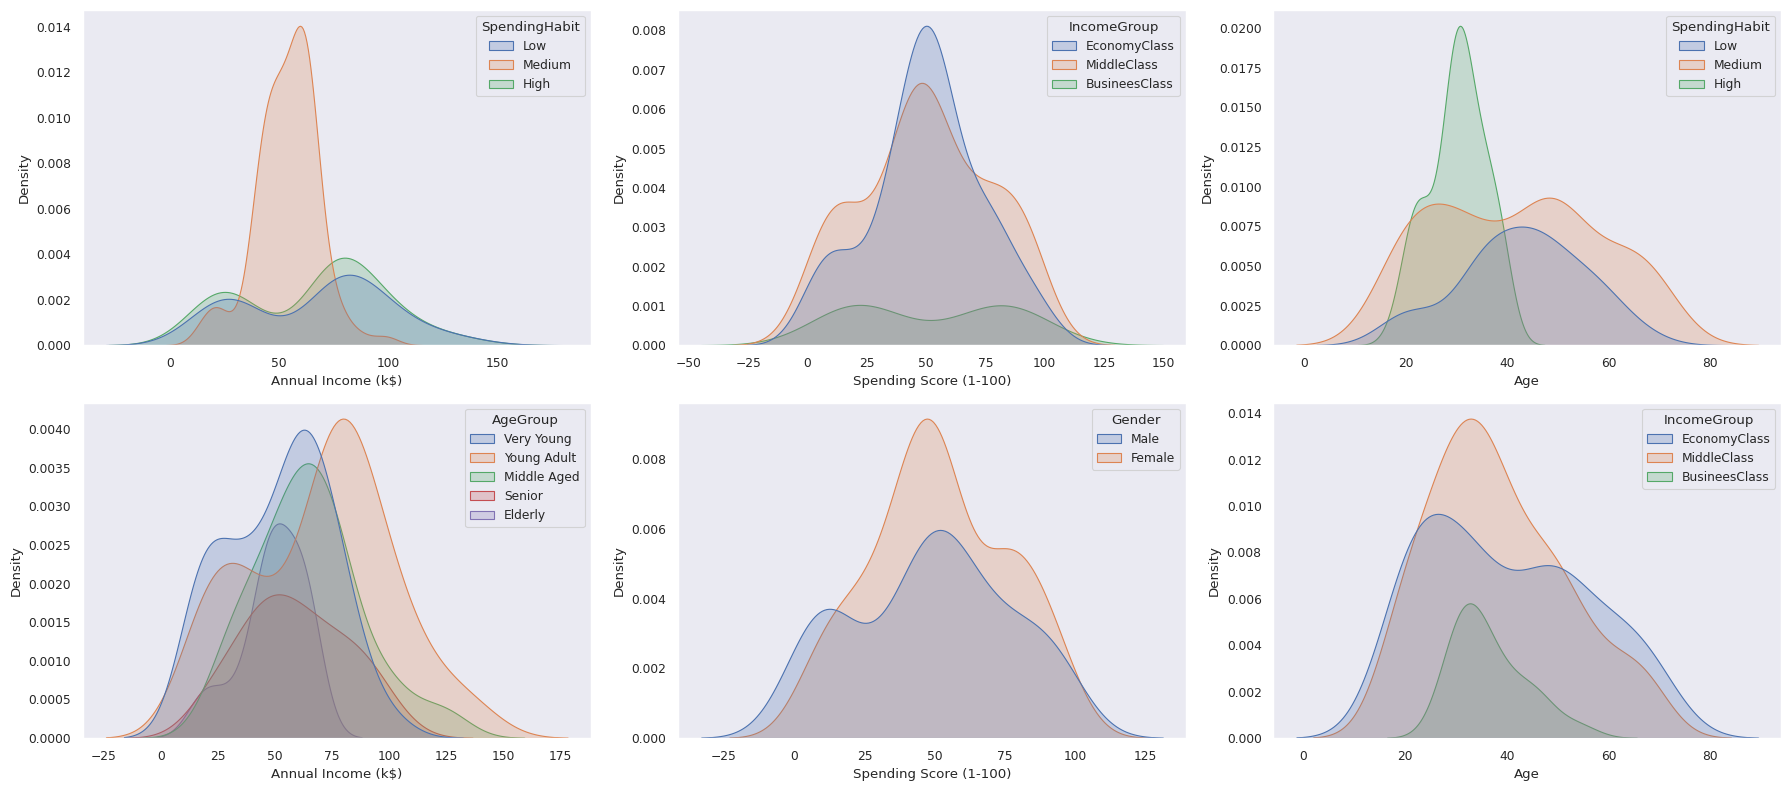

In [311]:
# Create subplots: 1 row, 3 columns, sharing y-axis
fig, axes = plt.subplots(2, 3, figsize=(18, 8), sharey=False)

# Plot KDE for Annual Income
sns.kdeplot(data=customer_dataNew, x="Annual Income (k$)",hue="SpendingHabit", ax=axes[0][0], fill=True, color= "0")
# axes[0][0].set_title("Annual Income (k$)")

# Plot KDE for Spending Score
sns.kdeplot(data=customer_dataNew, x="Spending Score (1-100)",hue="IncomeGroup", ax=axes[0][1], fill=True, )
# axes[0][1].set_title("Spending Score (1-100)")

# Plot KDE for Age
sns.kdeplot(data=customer_dataNew, x="Age",hue="SpendingHabit", ax=axes[0][2], fill=True, color= "purple")
# axes[0][2].set_title("Age")

# Plot KDE for Annual Income
sns.kdeplot(data=customer_dataNew, x="Annual Income (k$)",hue="AgeGroup", ax=axes[1][0], fill=True, color= "0")
# axes[1][1].set_title("Annual Income (k$)")

# Plot KDE for Spending Score
sns.kdeplot(data=customer_dataNew, x="Spending Score (1-100)",hue="Gender", ax=axes[1][1], fill=True, )
# axes[1][1].set_title("Spending Score (1-100)")

# Plot KDE for Age
sns.kdeplot(data=customer_dataNew, x="Age",hue="IncomeGroup", ax=axes[1][2], fill=True, color= "purple")
# axes[1][2].set_title("Age")

# Adjust layout
plt.tight_layout()
plt.show()


Here we created subplots (Kernel Distribution Estimation):
- We can see all the features depict nearly Normal Probability Distribution

### Data Processing

In [312]:
# Let's Treat Outliers ()

def calculateIQR(df,attribute):
    q3 = df[attribute].quantile(0.75)
    q1 = df[attribute].quantile(0.25)
    IQR = q3 - q1
    lower,upper = (q1 - (1.5*IQR) ,q3 + (1.5*IQR))
    return lower,upper

def nolies(entry,lower, upper):
    if ((entry < lower)or (entry > upper)):
        return "out"
    else:
        return "in"

In [313]:
#Let's Check percentage of Outliers Found
customer_Fresh = customer_dataNew.copy() 
lower, upper = calculateIQR(customer_Fresh,"Annual Income (k$)")
customer_Fresh["Outlier"] = customer_Fresh["Annual Income (k$)"].apply(lambda x: nolies(x,lower,upper) )
customer_Fresh["Outlier"].value_counts(normalize=False)


Outlier
in     198
out      2
Name: count, dtype: int64

Note: Based on previous boxplot we found presence of outlier in "Annual Income (k$)". 2 Outliers are found. Let's drop those rows.

In [314]:
#Let's drop the column
customer_Fresh.drop(customer_data[customer_Fresh["Outlier"]== "out"].index,inplace=True)
customer_Fresh.drop(["Outlier"],axis="columns",inplace=True)
customer_Fresh.shape

(198, 8)

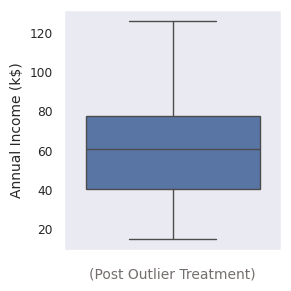

In [315]:
#Let's Verify if Outlier-Treatment
plt.figure(figsize=(3,3))
sns.boxplot(data=customer_Fresh, y="Annual Income (k$)",)
plt.ylabel("Annual Income (k$)",  fontsize = 10)
plt.xlabel("(Post Outlier Treatment)", fontsize = 10,color = "#746f6D")

plt.tight_layout()
plt.show()

#### Dummy-Variable (Using get_dummies())
- Concerned Column:
    - `Gender`
    - Note: Excluding `AgeGroup`,  `SpendingHabit`,  `IncomeGroup`. Else then can create multicollinearity in the model.

In [316]:
customer_Fresh.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),AgeGroup,SpendingHabit,IncomeGroup
0,1,Male,19,15,39,Very Young,Medium,EconomyClass
1,2,Male,21,15,81,Very Young,High,EconomyClass
2,3,Female,20,16,6,Very Young,Low,EconomyClass
3,4,Female,23,16,77,Very Young,High,EconomyClass
4,5,Female,31,17,40,Young Adult,Medium,EconomyClass


In [317]:
customer_Fresh["DummyGender"] = pd.get_dummies(customer_Fresh["Gender"],drop_first= True, dtype="int")
customer_Fresh.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),AgeGroup,SpendingHabit,IncomeGroup,DummyGender
0,1,Male,19,15,39,Very Young,Medium,EconomyClass,1
1,2,Male,21,15,81,Very Young,High,EconomyClass,1
2,3,Female,20,16,6,Very Young,Low,EconomyClass,0
3,4,Female,23,16,77,Very Young,High,EconomyClass,0
4,5,Female,31,17,40,Young Adult,Medium,EconomyClass,0


In [318]:
# let's Scale Feature(Age, Annual Income (k$), Spending Score (1-100))
scaler = MinMaxScaler()
X_Scaled = scaler.fit_transform(customer_Fresh[["Age","Annual Income (k$)","Spending Score (1-100)"]])


### Feature Extraction 

In [319]:
customer_data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [320]:
#Taking only last two columns for clustering
X1 = customer_Fresh[["Annual Income (k$)",'Spending Score (1-100)']]
X1.shape

(198, 2)

#### Choosing the Number of Clusters

- `Within Cluster Sum of Squares(WCSS)` - will help us deciding that hyperparameter using elbow plot.
$$
WCSS = \sum_{i=1}^{k} \sum_{x_j \in C_i} (x_j - \mu_i)^2
$$

In [321]:
#Finding WCSS Value for upto 10 Clusters (Raw Features)
wcss_raw = []
for i in range(1,11):
    kmeans1 = KMeans(n_clusters=i,init="k-means++",random_state=0)
    kmeans1.fit(X1)
    wcss_raw.append(kmeans1.inertia_)

In [322]:
#Finding WCSS Value for upto 10 Clusters (Scaled Features)
wcss_scaled = []
for i in range(1,11):
    kmeans2 = KMeans(n_clusters=i,init="k-means++",random_state=0)
    kmeans2.fit(X_Scaled)
    wcss_scaled.append(kmeans2.inertia_)

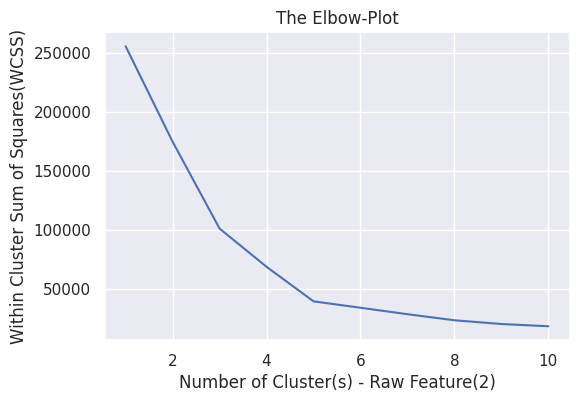

In [323]:
# Creating Elbow-Plot
sns.set_theme()
plt.figure(figsize=(6,4))
plt.plot(range(1,11),wcss_raw)
plt.title("The Elbow-Plot")
plt.xlabel("Number of Cluster(s) - Raw Feature(2)")
plt.ylabel("Within Cluster Sum of Squares(WCSS)")
plt.show()


- The Optimum number of Clusters will be 5

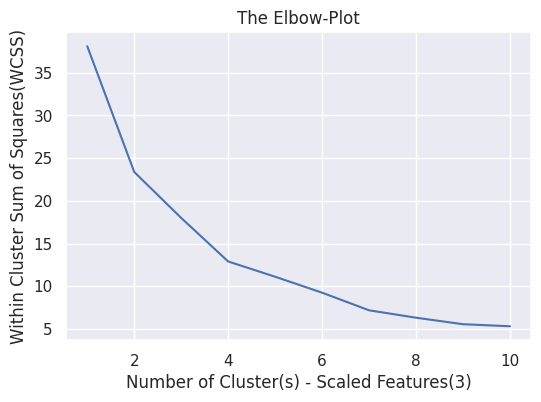

In [324]:
# Creating Elbow-Plot
sns.set_theme()
plt.figure(figsize=(6,4))
plt.plot(range(1,11),wcss_scaled)
plt.title("The Elbow-Plot")
plt.xlabel("Number of Cluster(s) - Scaled Features(3)")
plt.ylabel("Within Cluster Sum of Squares(WCSS)")
plt.show()


- The Optimum number of Clusters will be 7

### K-Means Clustering Model Training 

In [325]:
# Finalling fitting the model with 5 Clusters
fitKmeans1 = KMeans(n_clusters=5,init="k-means++",random_state= 0)

In [326]:
# Let's see how each data points are clustered
cluster1 = fitKmeans1.fit_predict(X1)
len(cluster1)

198

In [327]:
# Finalling fitting the model with 5 Clusters
fitKmeans2 = KMeans(n_clusters=7,init="k-means++",random_state= 0)

In [328]:
# Let's see how each data points are clustered
cluster2 = fitKmeans2.fit_predict(X_Scaled)
len(cluster2)

198

### Cluster Visualization

In [329]:
# Incorporating Cluster in the DataFrame
customer_segment1 = customer_Fresh.copy()
customer_segment1["Cluster"] = cluster1
customer_segment1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),AgeGroup,SpendingHabit,IncomeGroup,DummyGender,Cluster
0,1,Male,19,15,39,Very Young,Medium,EconomyClass,1,3
1,2,Male,21,15,81,Very Young,High,EconomyClass,1,2
2,3,Female,20,16,6,Very Young,Low,EconomyClass,0,3
3,4,Female,23,16,77,Very Young,High,EconomyClass,0,2
4,5,Female,31,17,40,Young Adult,Medium,EconomyClass,0,3


In [330]:
customer_segment1["Cluster"].value_counts()

Cluster
0    80
1    38
4    35
3    23
2    22
Name: count, dtype: int64

In [331]:
# Incorporating Cluster in the DataFrame
customer_segment2 = customer_Fresh.copy()
customer_segment2["Cluster"] = cluster2
customer_segment2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),AgeGroup,SpendingHabit,IncomeGroup,DummyGender,Cluster
0,1,Male,19,15,39,Very Young,Medium,EconomyClass,1,2
1,2,Male,21,15,81,Very Young,High,EconomyClass,1,6
2,3,Female,20,16,6,Very Young,Low,EconomyClass,0,5
3,4,Female,23,16,77,Very Young,High,EconomyClass,0,6
4,5,Female,31,17,40,Young Adult,Medium,EconomyClass,0,2


In [332]:
customer_segment2["Cluster"].value_counts()

Cluster
1    38
2    34
4    34
3    31
6    22
0    20
5    19
Name: count, dtype: int64

In [333]:
#Let's segregate the data as per cluster
cluster_range1 = range(5)
df01 = customer_segment1.loc[customer_segment1["Cluster"] == 0]
df11 = customer_segment1.loc[customer_segment1["Cluster"] == 1]
df21 = customer_segment1.loc[customer_segment1["Cluster"] == 2]
df31 = customer_segment1.loc[customer_segment1["Cluster"] == 3]
df41 = customer_segment1.loc[customer_segment1["Cluster"] == 4]

In [334]:
#Let's segregate the data as per cluster
cluster_range2 = range(7)
df02 = customer_segment2.loc[customer_segment2["Cluster"] == 0]
df12 = customer_segment2.loc[customer_segment2["Cluster"] == 1]
df22 = customer_segment2.loc[customer_segment2["Cluster"] == 2]
df32 = customer_segment2.loc[customer_segment2["Cluster"] == 3]
df42 = customer_segment2.loc[customer_segment2["Cluster"] == 4]
df52 = customer_segment2.loc[customer_segment2["Cluster"] == 5]
df62 = customer_segment2.loc[customer_segment2["Cluster"] == 6]

In [335]:
df01.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'AgeGroup', 'SpendingHabit', 'IncomeGroup',
       'DummyGender', 'Cluster'],
      dtype='object')

In [336]:
# Segregating Clusters
centroids = fitKmeans1.cluster_centers_
x_centre=[]
y_centre=[]
for i in range(len(centroids)):
    x_centre.append(centroids[i][0])
    y_centre.append(centroids[i][1])

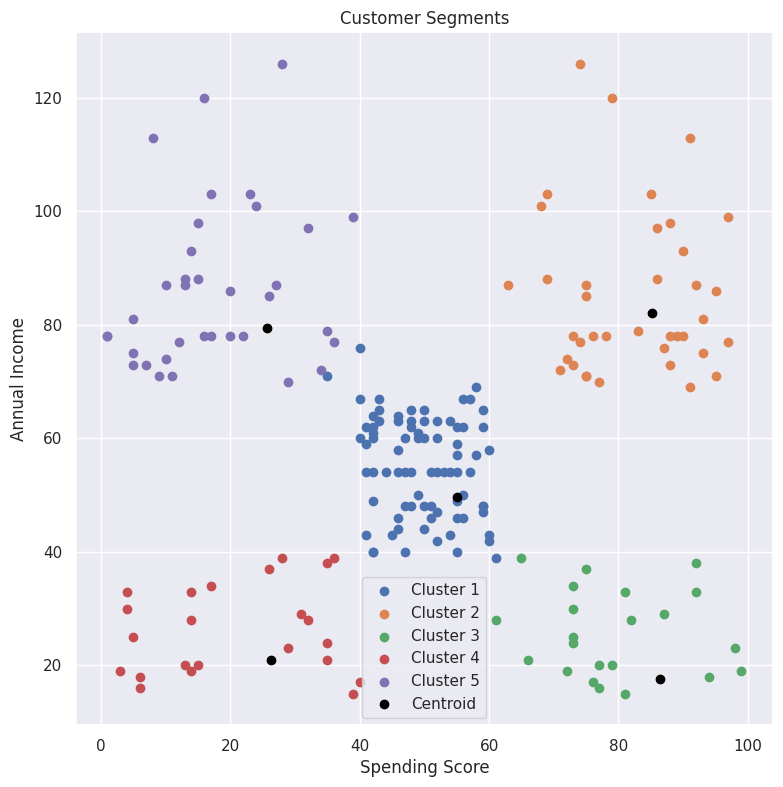

In [337]:
# Creating Cluster Visualization
plt.figure(figsize=(9,9))
plt.title("Customer Segments")
plt.scatter(df01['Spending Score (1-100)'],df01['Annual Income (k$)'],label="Cluster 1")
plt.scatter(df11['Spending Score (1-100)'],df11['Annual Income (k$)'],label="Cluster 2")
plt.scatter(df21['Spending Score (1-100)'],df21['Annual Income (k$)'],label="Cluster 3")
plt.scatter(df31['Spending Score (1-100)'],df31['Annual Income (k$)'],label="Cluster 4")
plt.scatter(df41['Spending Score (1-100)'],df41['Annual Income (k$)'],label="Cluster 5")
plt.scatter(x_centre,y_centre,c="black", label="Centroid")
plt.xlabel("Spending Score")
plt.ylabel("Annual Income")
plt.legend()
plt.show()

In [338]:
# Segregating Clusters
centroids = fitKmeans2.cluster_centers_
x_centre=[]
y_centre=[]
for i in range(len(centroids)):
    x_centre.append(centroids[i][0])
    y_centre.append(centroids[i][1])

In [339]:
#Let's check dimension of the certroids
centroids.shape

(7, 3)

In [340]:
df62.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),AgeGroup,SpendingHabit,IncomeGroup,DummyGender,Cluster
1,2,Male,21,15,81,Very Young,High,EconomyClass,1,6
3,4,Female,23,16,77,Very Young,High,EconomyClass,0,6
5,6,Female,22,17,76,Very Young,High,EconomyClass,0,6
7,8,Female,23,18,94,Very Young,High,EconomyClass,0,6
9,10,Female,30,19,72,Young Adult,High,EconomyClass,0,6


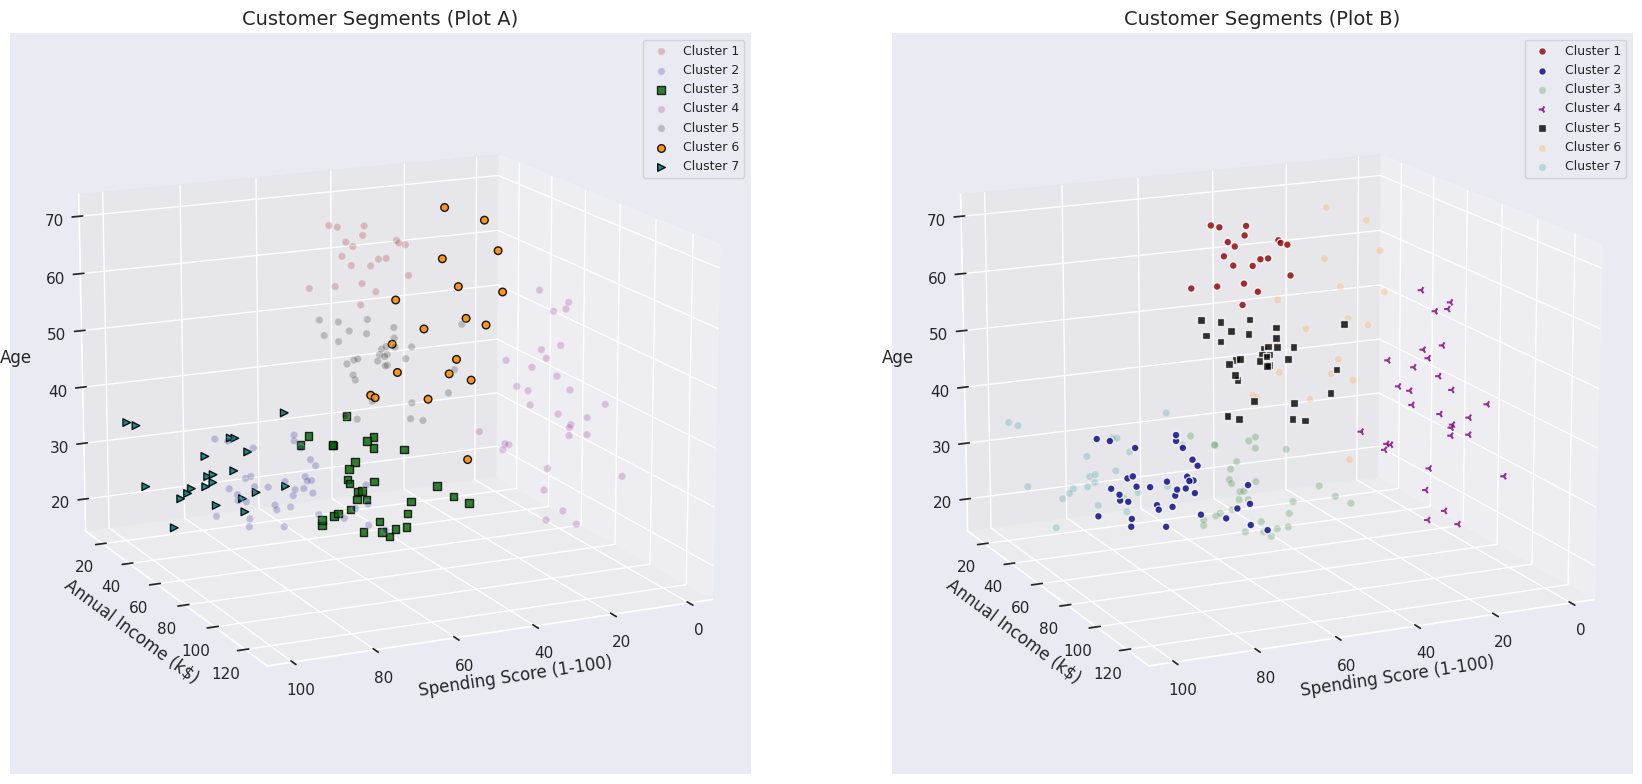

In [341]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18, 8))  # Wider figure for side-by-side plots

# --- Plot 1 (Left) ---
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_title("Customer Segments (Plot A)", fontsize=14)
ax1.set_xlabel("Spending Score (1-100)")
ax1.set_ylabel("Annual Income (k$)")
ax1.set_zlabel("Age", labelpad=10)
ax1.view_init(elev=15, azim=65)

# Cluster plot (plot A)
ax1.scatter(df02['Spending Score (1-100)'], df02['Annual Income (k$)'], df02['Age'],
            label="Cluster 1", c='darkred', s=30, alpha=0.2, edgecolors='white')
ax1.scatter(df12['Spending Score (1-100)'], df12['Annual Income (k$)'], df12['Age'],
            label="Cluster 2", c='navy', s=30, alpha=0.2, edgecolors='white')
ax1.scatter(df22['Spending Score (1-100)'], df22['Annual Income (k$)'], df22['Age'],
            label="Cluster 3", c='darkgreen', s=30, alpha=0.8, edgecolors='black',marker="s")
ax1.scatter(df32['Spending Score (1-100)'], df32['Annual Income (k$)'], df32['Age'],
            label="Cluster 4", c='purple', s=30, alpha=0.2, edgecolors='white')
ax1.scatter(df42['Spending Score (1-100)'], df42['Annual Income (k$)'], df42['Age'],
            label="Cluster 5", c='black', s=30, alpha=0.2, edgecolors='white')
ax1.scatter(df52['Spending Score (1-100)'], df52['Annual Income (k$)'], df52['Age'],
            label="Cluster 6", c='darkorange', s=30, alpha=0.9, edgecolors='black',marker="o")
ax1.scatter(df62['Spending Score (1-100)'], df62['Annual Income (k$)'], df62['Age'],
            label="Cluster 7", c='teal', s=30, alpha=0.9, edgecolors='black',marker=">")
ax1.legend(loc='upper right', fontsize=9)

# --- Plot 2 (Right) ---
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.set_title("Customer Segments (Plot B)", fontsize=14)
ax2.set_xlabel("Spending Score (1-100)")
ax2.set_ylabel("Annual Income (k$)")
ax2.set_zlabel("Age", labelpad=10)
ax2.view_init(elev=15, azim=65)

# Cluster plot (plot B)
ax2.scatter(df02['Spending Score (1-100)'], df02['Annual Income (k$)'], df02['Age'],
            label="Cluster 1", c='darkred', s=30, alpha=0.8, edgecolors='white')
ax2.scatter(df12['Spending Score (1-100)'], df12['Annual Income (k$)'], df12['Age'],
            label="Cluster 2", c='navy', s=30, alpha=0.8, edgecolors='white')
ax2.scatter(df22['Spending Score (1-100)'], df22['Annual Income (k$)'], df22['Age'],
            label="Cluster 3", c='darkgreen', s=30, alpha=0.2, edgecolors='white')
ax2.scatter(df32['Spending Score (1-100)'], df32['Annual Income (k$)'], df32['Age'],
            label="Cluster 4", c='purple', s=30, alpha=0.8, edgecolors='white',marker="3")
ax2.scatter(df42['Spending Score (1-100)'], df42['Annual Income (k$)'], df42['Age'],
            label="Cluster 5", c='black', s=30, alpha=0.8, edgecolors='white',marker="s")
ax2.scatter(df52['Spending Score (1-100)'], df52['Annual Income (k$)'], df52['Age'],
            label="Cluster 6", c='darkorange', s=30, alpha=0.2, edgecolors='white')
ax2.scatter(df62['Spending Score (1-100)'], df62['Annual Income (k$)'], df62['Age'],
            label="Cluster 7", c='teal', s=30, alpha=0.2, edgecolors='white')
ax2.legend(loc='upper right', fontsize=9)

plt.tight_layout()
plt.show()


**Note:**
- Here we have not included centroids for two reasons as follows:
    - Centroids are 3-Dimensional Vectors
    - They are computed on scaled-features

### Marketing Decision Framework

| **Decision Area** | **Actions** |
|-------------------|-------------|
| **Segmentation**  | * Identification of various bases for dividing the market<br>* Developing profiles of the marketing segments |
| **Targeting**     | * Evaluating the market segment for their attractiveness<br>* Deciding the market coverage strategy |
| **Positioning**   | * Identifying a set of possible competitive advantages of the brand<br>* Selecting the right competitive advantage<br>* Communicating the chosen competitive advantage to the target customers |


#### Interactive Visualization of 3D Clusters using Plotly

In [342]:
# Create traces for each cluster
trace0 = go.Scatter3d(
    x=df02['Spending Score (1-100)'],
    y=df02['Annual Income (k$)'],
    z=df02['Age'],
    mode='markers',
    marker=dict(size=5),
    name='Cluster 1'
)

trace1 = go.Scatter3d(
    x=df12['Spending Score (1-100)'],
    y=df12['Annual Income (k$)'],
    z=df12['Age'],
    mode='markers',
    marker=dict(size=5),
    name='Cluster 2'
)

trace2 = go.Scatter3d(
    x=df22['Spending Score (1-100)'],
    y=df22['Annual Income (k$)'],
    z=df22['Age'],
    mode='markers',
    marker=dict(size=5),
    name='Cluster 3'
)

trace3 = go.Scatter3d(
    x=df32['Spending Score (1-100)'],
    y=df32['Annual Income (k$)'],
    z=df32['Age'],
    mode='markers',
    marker=dict(size=5),
    name='Cluster 4'
)

trace4 = go.Scatter3d(
    x=df42['Spending Score (1-100)'],
    y=df42['Annual Income (k$)'],
    z=df42['Age'],
    mode='markers',
    marker=dict(size=5),
    name='Cluster 5'
)

trace5 = go.Scatter3d(
    x=df52['Spending Score (1-100)'],
    y=df52['Annual Income (k$)'],
    z=df52['Age'],
    mode='markers',
    marker=dict(size=5),
    name='Cluster 6'
)

trace6 = go.Scatter3d(
    x=df62['Spending Score (1-100)'],
    y=df62['Annual Income (k$)'],
    z=df62['Age'],
    mode='markers',
    marker=dict(size=5),
    name='Cluster 7'
)

# Combine all traces
data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6]

# Layout configuration
layout = go.Layout(
    title='Customer Segments (Interactive 3D)',
    scene=dict(
        xaxis_title='Spending Score',
        yaxis_title='Annual Income (k$)',
        zaxis_title='Age'
    ),
    margin=dict(l=0, r=0, b=0, t=40),
    legend=dict(x=0, y=1)
)

# Plot figure
fig = go.Figure(data=data, layout=layout)
fig.show()


#### Segmentation Analysis
- In this section, we shall filter out each cluster `(Income-Spending-Age)`.
- We shall dive deep, we fetch unique insights about each clusters.

In [343]:
#First let's see how many datapoints each cluster has
start = 1
for i,j in zip(customer_segment2["Cluster"].value_counts(), customer_segment2["Cluster"].value_counts(normalize=True)):
    print(f'Cluster {start} : Count={i} Percentage = {round(j*100,2)}')
    start += 1

Cluster 1 : Count=38 Percentage = 19.19
Cluster 2 : Count=34 Percentage = 17.17
Cluster 3 : Count=34 Percentage = 17.17
Cluster 4 : Count=31 Percentage = 15.66
Cluster 5 : Count=22 Percentage = 11.11
Cluster 6 : Count=20 Percentage = 10.1
Cluster 7 : Count=19 Percentage = 9.6


In [344]:
#Let's crete separate dataframes for each cluster (Dropped ["DummyGender","Cluster"] columns )
customer_cls1 = customer_segment2[customer_segment2["Cluster"]==0].drop(["DummyGender","Cluster"],axis= "columns")
customer_cls2 = customer_segment2[customer_segment2["Cluster"]==1].drop(["DummyGender","Cluster"],axis= "columns")
customer_cls3 = customer_segment2[customer_segment2["Cluster"]==2].drop(["DummyGender","Cluster"],axis= "columns")
customer_cls4 = customer_segment2[customer_segment2["Cluster"]==3].drop(["DummyGender","Cluster"],axis= "columns")
customer_cls5 = customer_segment2[customer_segment2["Cluster"]==4].drop(["DummyGender","Cluster"],axis= "columns")
customer_cls6 = customer_segment2[customer_segment2["Cluster"]==5].drop(["DummyGender","Cluster"],axis= "columns")
customer_cls7 = customer_segment2[customer_segment2["Cluster"]==6].drop(["DummyGender","Cluster"],axis= "columns")

In [345]:
customer_cls1.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),AgeGroup,SpendingHabit,IncomeGroup
40,41,Female,65,38,35,Elderly,Medium,EconomyClass
53,54,Male,59,43,60,Senior,Medium,EconomyClass


#### Cluster-Wise Analysis

In [380]:
desc1 = customer_cls1.describe().loc[["mean","50%","std","max"],["Age",	"Annual Income (k$)","Spending Score (1-100)"]]
desc2 = customer_cls2.describe().loc[["mean","50%","std","max"],["Age",	"Annual Income (k$)","Spending Score (1-100)"]]
desc3 = customer_cls3.describe().loc[["mean","50%","std","max"],["Age",	"Annual Income (k$)","Spending Score (1-100)"]]
desc4 = customer_cls4.describe().loc[["mean","50%","std","max"],["Age",	"Annual Income (k$)","Spending Score (1-100)"]]
desc5 = customer_cls5.describe().loc[["mean","50%","std","max"],["Age",	"Annual Income (k$)","Spending Score (1-100)"]]
desc6 = customer_cls6.describe().loc[["mean","50%","std","max"],["Age",	"Annual Income (k$)","Spending Score (1-100)"]]
desc7 = customer_cls7.describe().loc[["mean","50%","std","max"],["Age",	"Annual Income (k$)","Spending Score (1-100)"]]

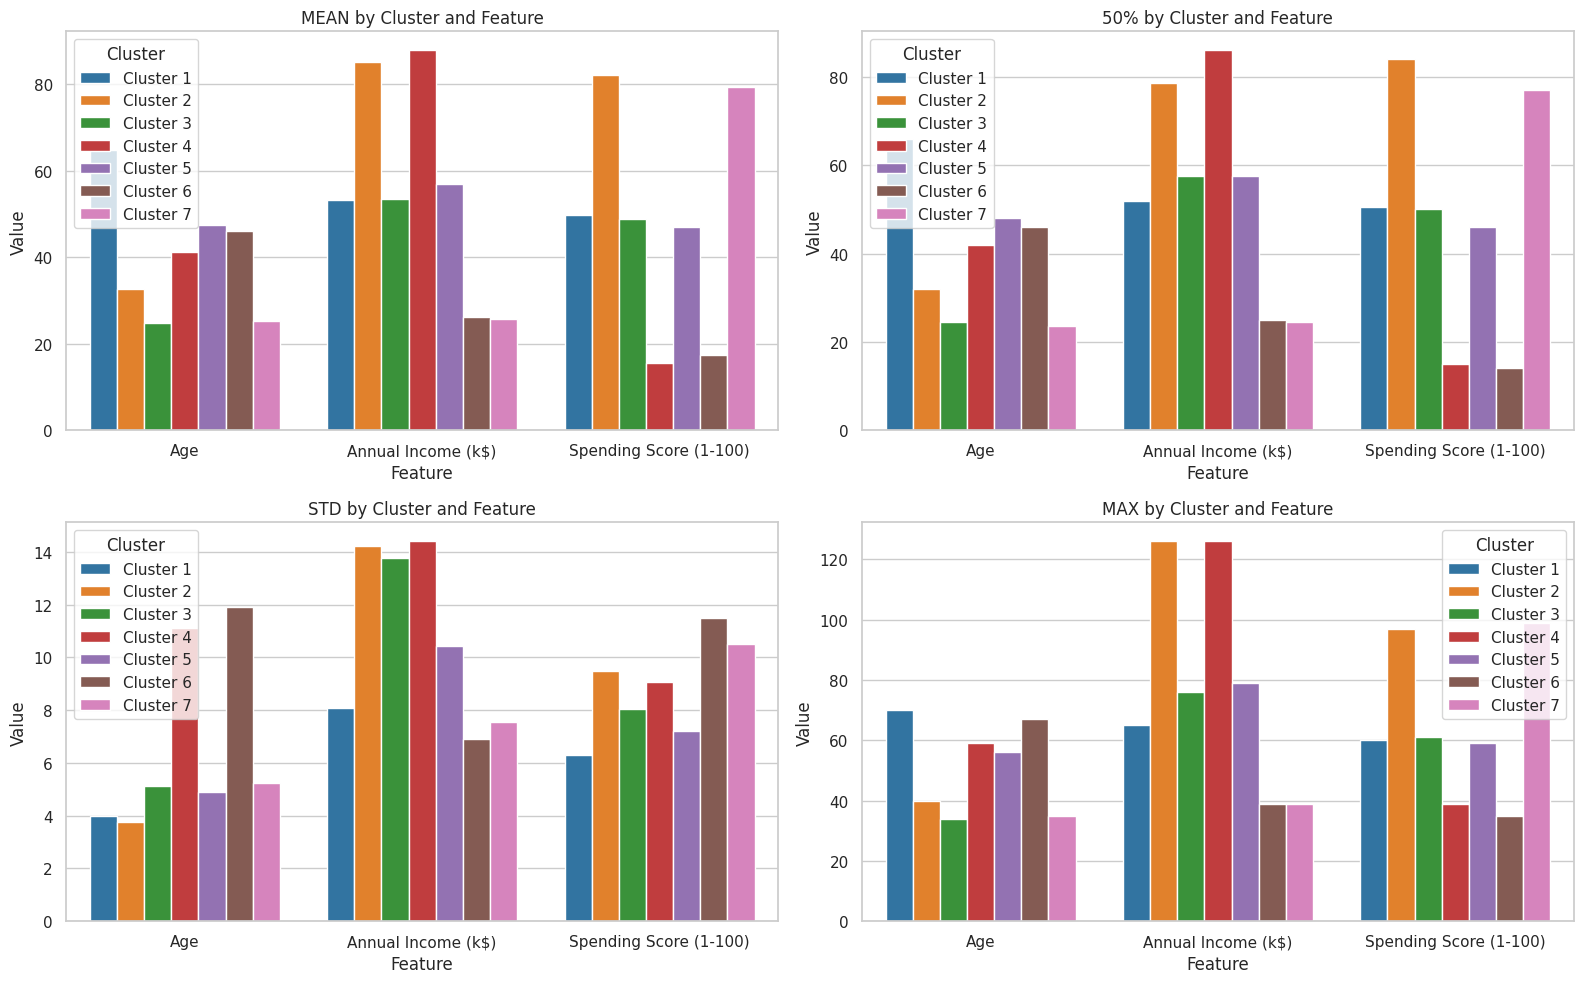

In [385]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the description data
desc_list = []
for i, desc in enumerate([desc1, desc2, desc3, desc4, desc5, desc6, desc7], start=1):
    df = desc.copy()
    df["Cluster"] = f"Cluster {i}"
    df["Statistic"] = df.index
    desc_list.append(df)

# Combine and melt the data
combined_desc = pd.concat(desc_list)
melted = combined_desc.melt(id_vars=["Cluster", "Statistic"], var_name="Feature", value_name="Value")

# Set seaborn style
sns.set(style="whitegrid")

# Create 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
stat_order = ["mean", "50%", "std", "max"]
axes = axes.flatten()

for idx, stat in enumerate(stat_order):
    ax = axes[idx]
    subset = melted[melted["Statistic"] == stat]
    sns.barplot(
        data=subset,
        x="Feature",
        y="Value",
        hue="Cluster",
        ax=ax,
        palette="tab10"
    )
    ax.set_title(f"{stat.upper()} by Cluster and Feature")
    ax.set_xlabel("Feature")
    ax.set_ylabel("Value")
    ax.legend().set_title("Cluster")

plt.tight_layout()
plt.show()


In [377]:
corr1 = customer_cls1[["Age","Annual Income (k$)","Spending Score (1-100)"]].corr()
corr2 = customer_cls2[["Age","Annual Income (k$)","Spending Score (1-100)"]].corr()
corr3 = customer_cls3[["Age","Annual Income (k$)","Spending Score (1-100)"]].corr()
corr4 = customer_cls4[["Age","Annual Income (k$)","Spending Score (1-100)"]].corr()
corr5 = customer_cls5[["Age","Annual Income (k$)","Spending Score (1-100)"]].corr()
corr6 = customer_cls6[["Age","Annual Income (k$)","Spending Score (1-100)"]].corr()
corr7 = customer_cls7[["Age","Annual Income (k$)","Spending Score (1-100)"]].corr()

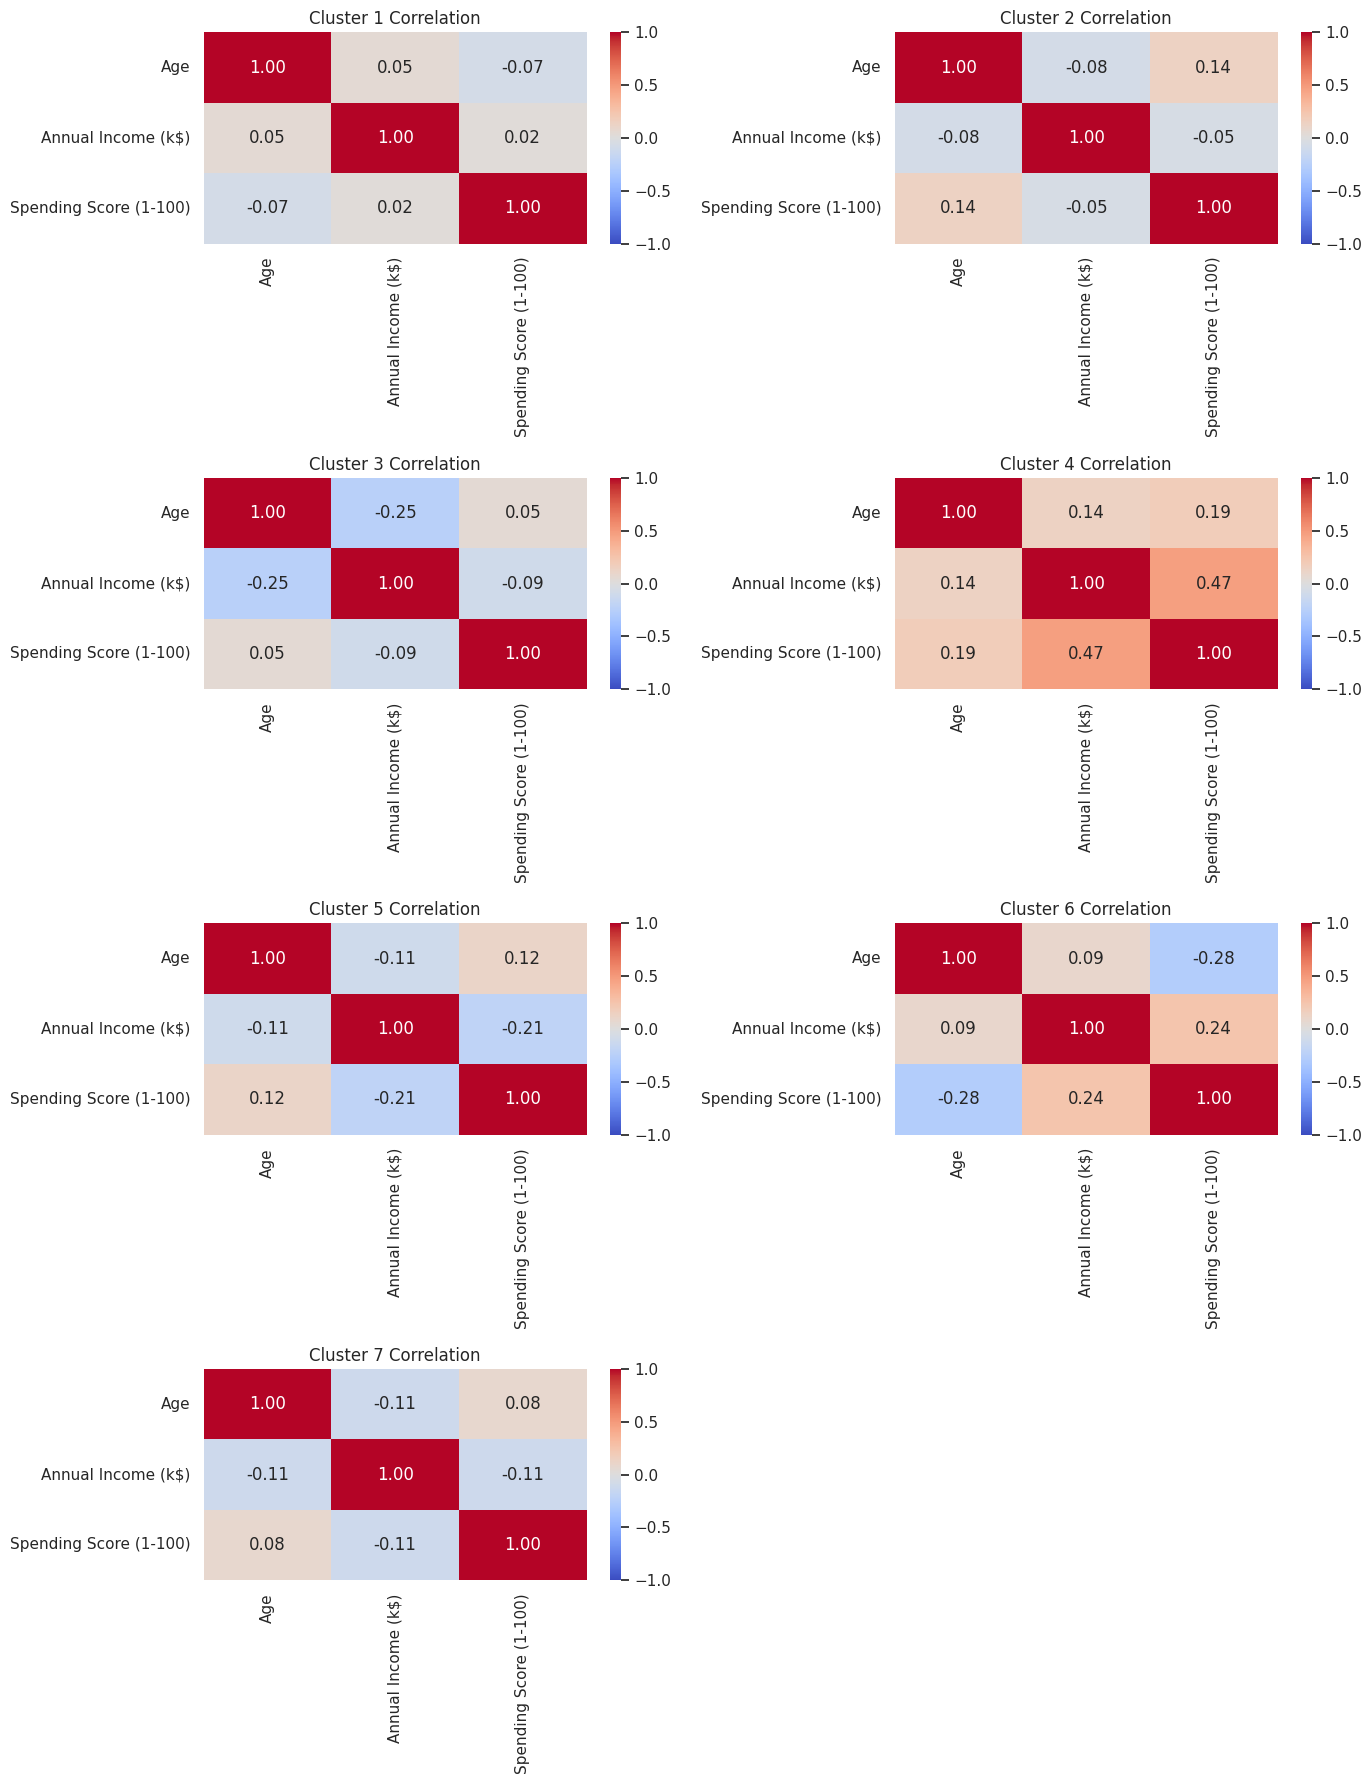

In [388]:
# List of correlation matrices
corrs = [corr1, corr2, corr3, corr4, corr5, corr6, corr7]

# Set up the figure for 4 rows × 2 columns
fig, axes = plt.subplots(4, 2, figsize=(14, 18))
axes = axes.flatten()

# Plot each heatmap
for i, corr in enumerate(corrs):
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, ax=axes[i])
    axes[i].set_title(f"Cluster {i+1} Correlation")

# Hide the 8th unused subplot
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


#### Statistical Inference and Regression Analysis
- In this Section we shall develop a simple `Log-Log Regression Model` (Income-Spending)
- Fecth information about `elasticity` of Spending Habits.
- We shall make inferferece on `Income-Consumption hypothesis` for each cluster and sample as a whole through Hypothesis Testing
- Try to understand +ve and -ve income effect.